In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(URL)

# Check if the request was successful
if response.status_code == 200:
    data = response.content
    df = pd.read_csv(io.StringIO(data.decode('utf-8')))
    print('Data downloaded and read into a dataframe!')
else:
    print('Failed to fetch data from the URL.')


Data downloaded and read into a dataframe!


In [8]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [9]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# TASK 1.1

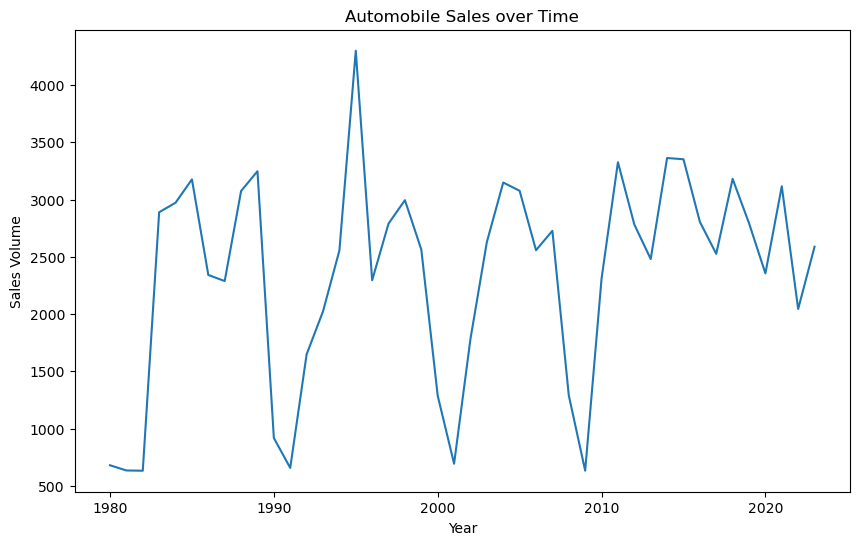

In [10]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

# Plotting the line chart
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales over Time')
plt.show()

_________________________

# TASK 1.2

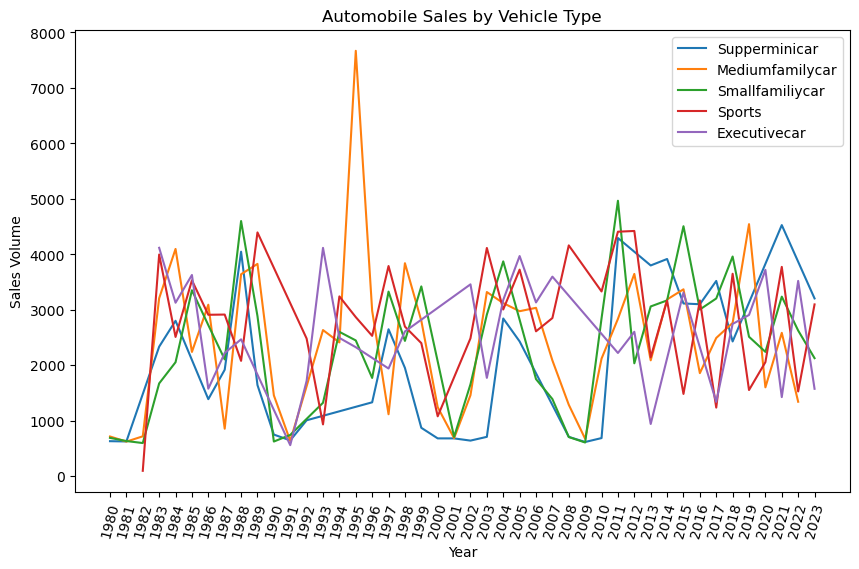

In [13]:
df_grouped = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Plotting the line chart for each vehicle type
plt.figure(figsize=(10, 6))
for vehicle_type in df['Vehicle_Type'].unique():
    df_vehicle_type = df_grouped[df_grouped['Vehicle_Type'] == vehicle_type]
    plt.plot(df_vehicle_type['Year'], df_vehicle_type['Automobile_Sales'], label=vehicle_type)

plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.title('Automobile Sales by Vehicle Type')
plt.xticks(list(df_grouped['Year'].unique()), rotation=75)
plt.legend()
plt.show()

_______

# TASK 1.3

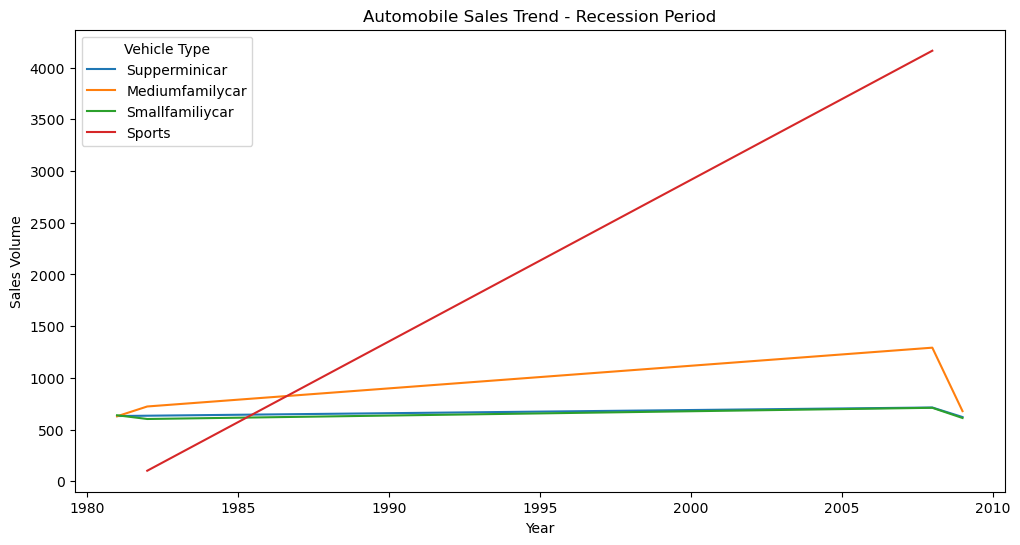

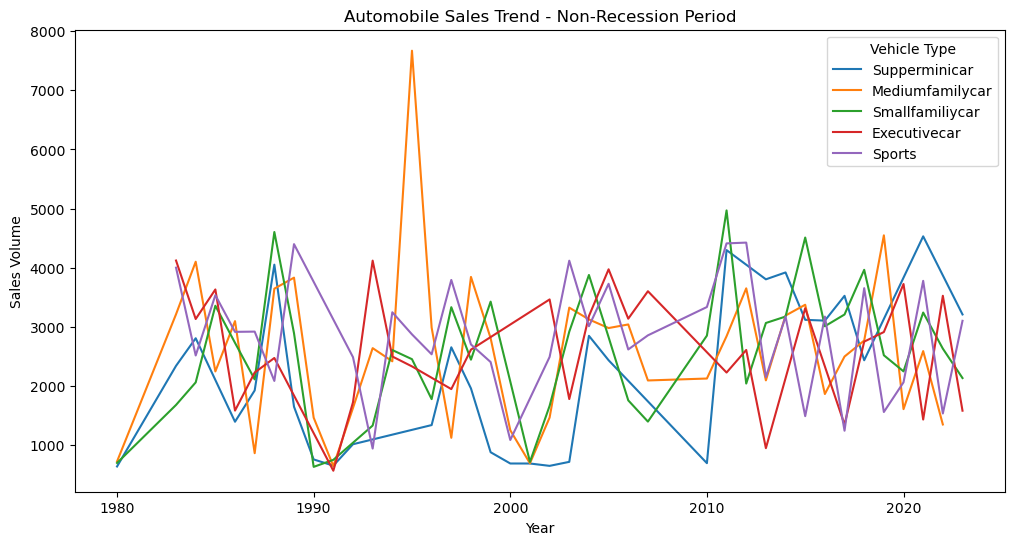

In [18]:
def is_recession(year):
    # Implement your logic to determine recession years
    # For example, you can use a list of recession years or apply specific conditions on the data.
    # For this example, let's assume a simple condition:
    recession_years = [1981, 1982, 2008, 2009]
    return year in recession_years

# Create two DataFrames for recession and non-recession periods
recession_years_df = df[df['Year'].apply(is_recession)]
non_recession_years_df = df[~df['Year'].apply(is_recession)]

# Create line plots for recession and non-recession periods using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=recession_years_df, x='Year', y='Automobile_Sales', hue='Vehicle_Type', errorbar=None)
plt.title('Automobile Sales Trend - Recession Period')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend(title='Vehicle Type')

plt.figure(figsize=(12, 6))
sns.lineplot(data=non_recession_years_df, x='Year', y='Automobile_Sales', hue='Vehicle_Type', errorbar=None)
plt.title('Automobile Sales Trend - Non-Recession Period')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.legend(title='Vehicle Type')

plt.show()

______

# TASK 1.4

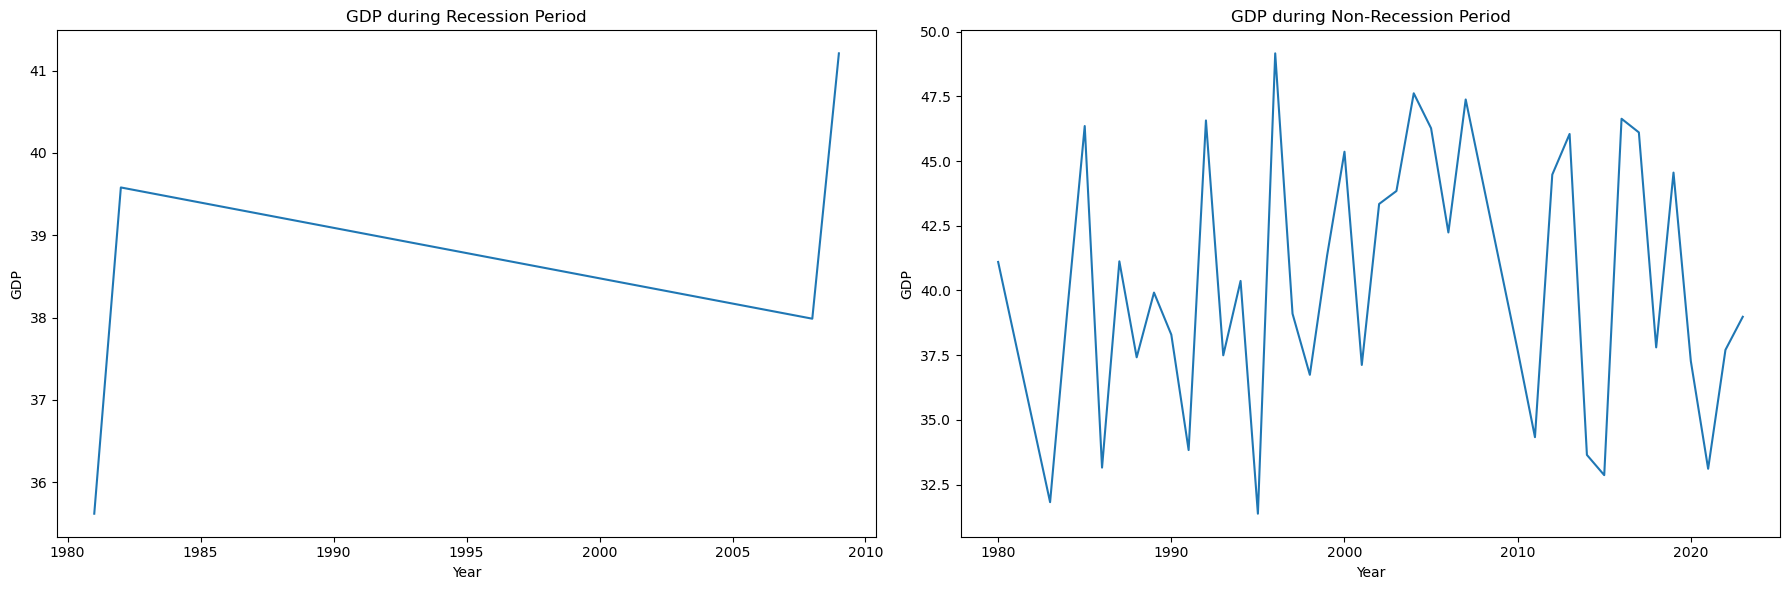

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for recession years
sns.lineplot(data=recession_years_df, x='Year', y='GDP', errorbar=None, ax=axes[0])
axes[0].set_title('GDP during Recession Period')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('GDP')

# Plot for non-recession years
sns.lineplot(data=non_recession_years_df, x='Year', y='GDP', errorbar=None, ax=axes[1])
axes[1].set_title('GDP during Non-Recession Period')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

______

# TASK 1.5

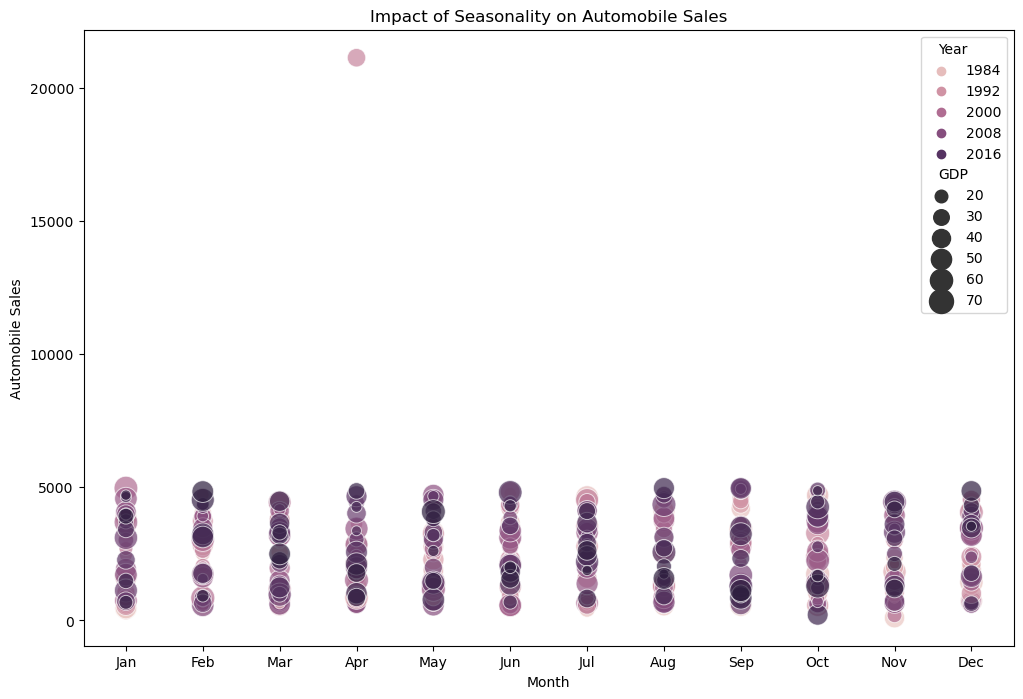

In [35]:
# Create the bubble plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Month', y='Automobile_Sales', hue='Year', size='GDP', sizes=(50, 300), alpha=0.7)

# Set axis labels and title
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Impact of Seasonality on Automobile Sales')

# Show the plot
plt.show()

_____________

# TASK 1.6

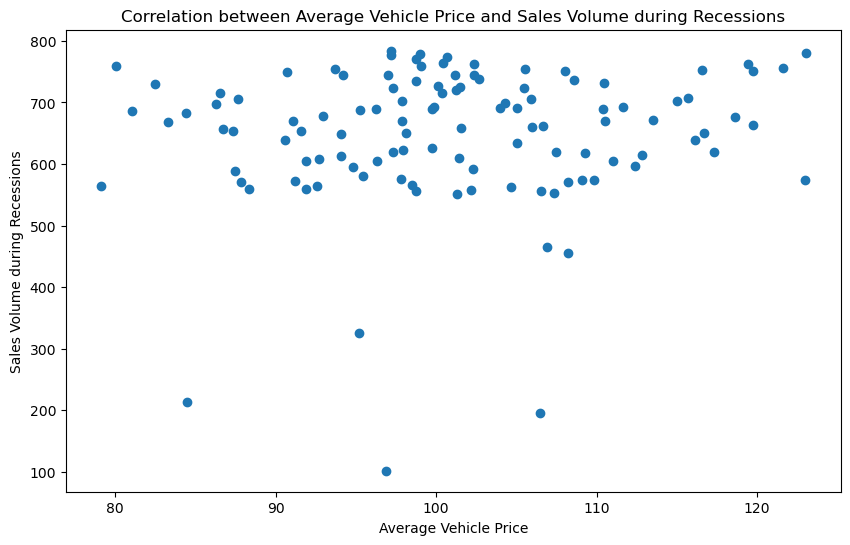

In [40]:
# Filter data for recession periods
recession_data = df[df['Recession'] == 1]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Consumer_Confidence'], recession_data['Automobile_Sales'])

# Set axis labels and title
plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales Volume during Recessions')
plt.title('Correlation between Average Vehicle Price and Sales Volume during Recessions')

# Show the plot
plt.show()

_________

# TASK 1.7

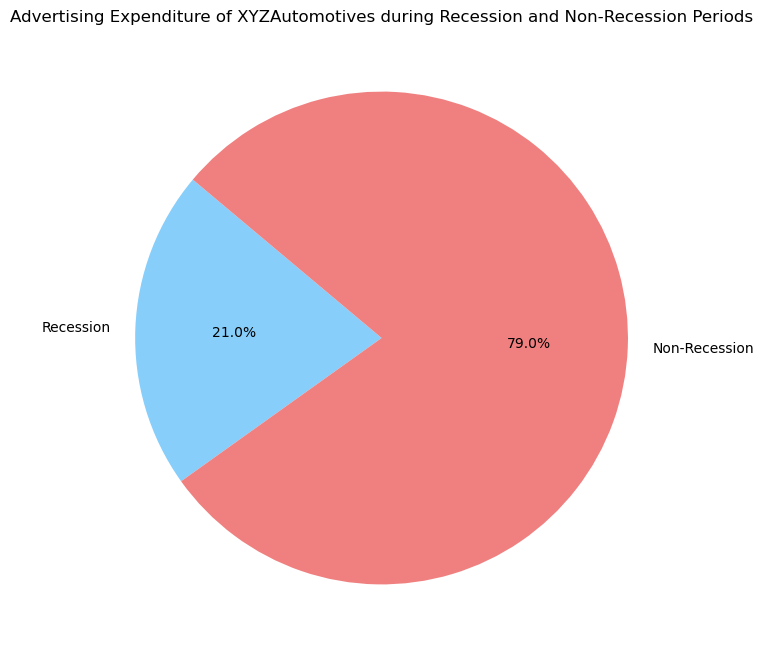

In [41]:
# Filter data for recession and non-recession periods
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]

# Calculate total advertising expenditure for each period
total_advertising_recession = recession_data['Advertising_Expenditure'].sum()
total_advertising_non_recession = non_recession_data['Advertising_Expenditure'].sum()

# Create labels for the pie chart
labels = ['Recession', 'Non-Recession']

# Create data for the pie chart
advertising_expenditure = [total_advertising_recession, total_advertising_non_recession]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(advertising_expenditure, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightskyblue', 'lightcoral'])

# Set title
plt.title('Advertising Expenditure of XYZAutomotives during Recession and Non-Recession Periods')

# Show the plot
plt.show()

________

# TASK 1.8

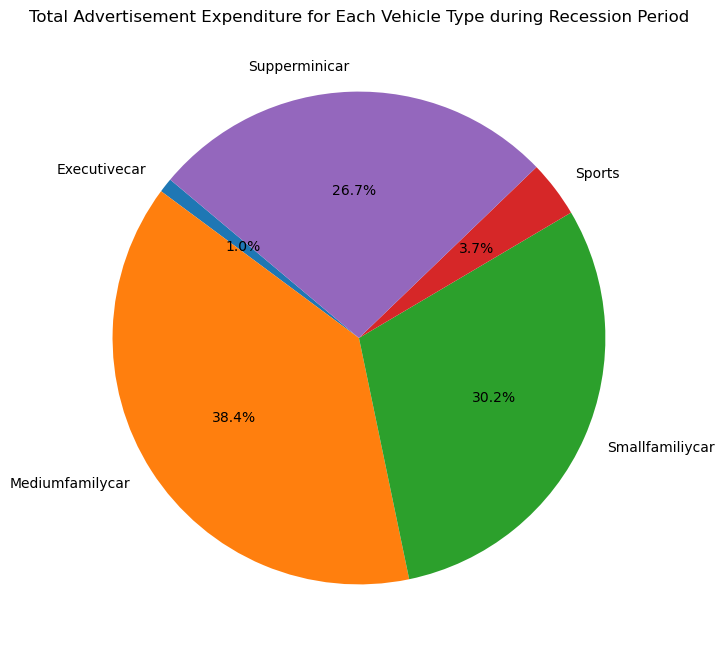

In [43]:
# Filter data for recession period
recession_data = df[df['Recession'] == 1]

# Calculate total advertisement expenditure for each vehicle type during recession period
total_advertising_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create labels for the pie chart
labels = total_advertising_by_vehicle_type.index

# Create data for the pie chart
advertising_expenditure = total_advertising_by_vehicle_type.values

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(advertising_expenditure, labels=labels, autopct='%1.1f%%', startangle=140)

# Set title
plt.title('Total Advertisement Expenditure for Each Vehicle Type during Recession Period')

# Show the plot
plt.show()

_____________

# TASK 1.9

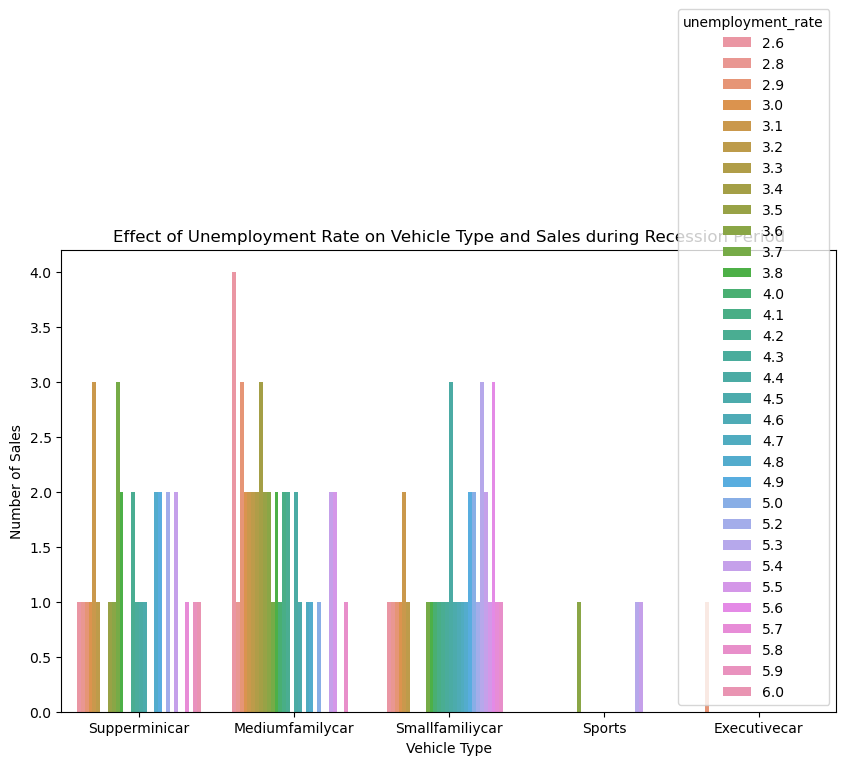

In [44]:
# Filter data for recession period
recession_data = df[df['Recession'] == 1]

# Create a countplot to analyze the effect of unemployment rate on vehicle type and sales
plt.figure(figsize=(10, 6))
sns.countplot(data=recession_data, x='Vehicle_Type', hue='unemployment_rate')

# Set axis labels and title
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Sales')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession Period')

# Show the plot
plt.show()

________________

**Códigos fornecidos por um modelo de linguagem GPT-3.5 da OpenAI."**